In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
HUES = ["Devices", "Ad Types"]

In [4]:
market_df = pd.read_csv("final_shop_6modata.csv")
market_df.head()

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951
2,Shop - 1:1 - Desk - [shop discount code],July,3635,1458,0.40,248,0.09,1606,1.10,1723,39165.46,117.136
3,Shop - 1:1 - Desk - [shop promo code],July,26185,10418,0.40,2294,0.12,13278,1.27,13042,284823.48,-235.921
4,Shop - 1:1 - Desk - [shop promo],July,808,282,0.35,61,0.15,391,1.39,337,7717.77,-53.604


In [5]:
def find_outliers(data: pd.DataFrame, feature: str)-> pd.DataFrame:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    low_iqr = data[feature] < q1 - 1.5*iqr
    high_iqr = data[feature] > q3 + 1.5*iqr

    outliers = data[low_iqr | high_iqr]

    print("Outliers Couns: ", len(outliers))
    top_outliers = outliers.sort_values(feature, ascending=False)[:5]

    print("Top Outliers Data:\n", top_outliers)

    return outliers

In [59]:
def box_and_line_plots(data: pd.DataFrame, feature: str):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))

    for i, _ in enumerate(axes):
        if i == 0:
            sns.boxplot(x=data[feature], ax=axes[0, 0])
            sns.lineplot(x="Month",y=market_df[feature], data=data, ax=axes[0, 1])
        else:
            sns.boxplot(x=data[feature], y=data[HUES[i-1]], ax=axes[i, 0])
            sns.lineplot(x="Month",y=market_df[feature], hue=HUES[i-1], data=data, ax=axes[i, 1])

    plt.show()

In [ ]:
def multivariate_plot(data: pd.DataFrame, feature: str):
    pass

In [6]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


In [7]:
market_df.isnull().any().sum()

0

In [8]:
market_df.duplicated(keep=False).sum()

0

In [9]:
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951


In [10]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB


##### **Manipulating Ad Group**
<p>The ad group contain multiple words that could be separated into sevaral columns to deepend our analysis</p>

In [11]:
market_df[["Shop", "Ad Types", "Devices", "Campaigns"]] = market_df["Ad Group"].str.split(" - ", n=3, expand=True)
market_df.head(2)

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Shop,Ad Types,Devices,Campaigns
0,Shop - 1:1 - Desk - [shop coupon code],July,16038,6504,0.41,1166,0.10,6669,1.03,6402,136770.05,-267.086,Shop,1:1,Desk,[shop coupon code]
1,Shop - 1:1 - Desk - [shop coupon],July,36462,14367,0.39,2188,0.09,13746,0.96,13262,283215.21,-483.951,Shop,1:1,Desk,[shop coupon]


In [12]:
market_df.drop([["Shop", "Ad Group"]], axis=1, inplace=True)

In [13]:
# # Cleaned Campaigned
# cleaned_name = {}
# for campaign in market_df["Campaigns"].unique():
#     if "[" in campaign:
#         cleaned_name[campaign] = campaign.strip("[]")
#     else:
#         cleaned_name[campaign] = campaign

# market_df["Campaigns"].replace(cleaned_name, inplace=True)

In [14]:
# Change device data for better clarity
initial_name = market_df["Devices"].unique()
new_name = ["Desktop", "Mobile"]
change_name = dict(zip(initial_name, new_name))

market_df["Devices"].replace(change_name, inplace=True)

##### **Checking Impression Data**

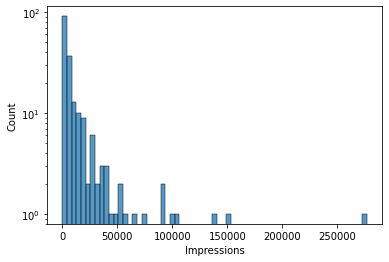

In [15]:
sns.histplot(market_df["Impressions"])
plt.yscale("log")

In [27]:
outliers = find_outliers(market_df, "Impressions")
len(outliers)

21

In [18]:
market_df.describe()["Impressions"]

count       190.000000
mean      14077.363158
std       29771.686227
min          35.000000
25%        1065.000000
50%        4969.000000
75%       13380.000000
max      276568.000000
Name: Impressions, dtype: float64

In [20]:
market_df[market_df["Impressions"] == market_df["Impressions"].max()]

,Ad Group,Month,Impressions,Clicks,CTR,Conversions,Conv Rate,Cost,CPC,Revenue,Sale Amount,P&L,Ad Types,Devices,Campaigns
151,Shop - 1:1 - Mob - [shop coupon],November,276568,99526,0.36,5961,0.05,38273,0.38,32668,677188.1,-5605.297,1:1,Mobile,[shop coupon]


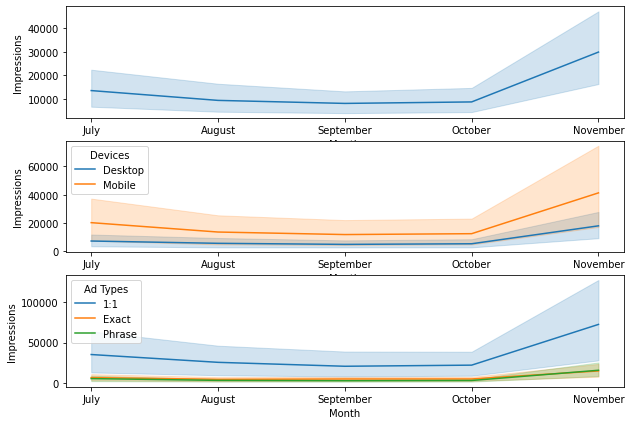

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 7))

sns.lineplot(x="Month",y=market_df["Impressions"], data=market_df, ax=axes[0])
sns.lineplot(x="Month",y=market_df["Impressions"], hue="Devices", data=market_df, ax=axes[1])
sns.lineplot(x="Month",y=market_df["Impressions"], hue="Ad Types", data=market_df, ax=axes[2])

plt.show()

##### Key Takeaways from Impressions
<p>Overall Impression average is 14077, which means the ads are shown to user 14077.363 at average from July to November</p>
<p>From July to August, the impressin is dropped but and tend to decline until October, but on october the impressions are soaring</p>